In [43]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [44]:
X = np.arange(0.0, 5.0, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

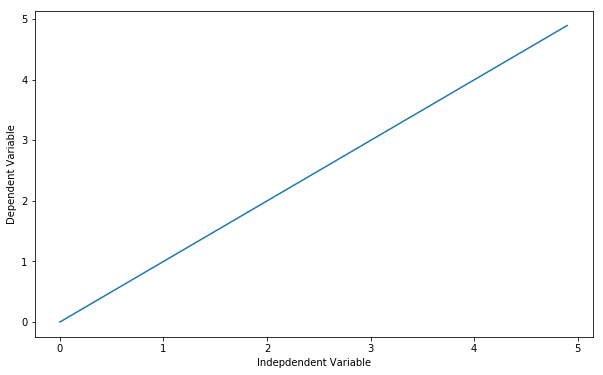

In [45]:
##You can adjust the slope and intercept to verify the changes in the graph
a=1
b=0

Y= a*X + b 

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [53]:
x_data = np.random.rand(100).astype(np.float32)
x_data

array([ 0.69985819,  0.58609349,  0.61587781,  0.52766615,  0.36103296,
        0.85257763,  0.25579378,  0.22551936,  0.98625565,  0.85644305,
        0.23991992,  0.06069067,  0.66529846,  0.40647972,  0.7775737 ,
        0.61714375,  0.00808574,  0.59722507,  0.89310747,  0.04022781,
        0.30001813,  0.90410686,  0.33565098,  0.24672003,  0.330369  ,
        0.86992484,  0.95810646,  0.5279426 ,  0.92478234,  0.36557078,
        0.34951839,  0.96057045,  0.07277753,  0.19268014,  0.59570485,
        0.77824396,  0.03300158,  0.66084015,  0.70514596,  0.78710032,
        0.2337926 ,  0.23041098,  0.31940413,  0.24678218,  0.57516074,
        0.88803083,  0.96434897,  0.82502484,  0.57279289,  0.22764276,
        0.12153555,  0.15645757,  0.30143669,  0.95435673,  0.11251821,
        0.35214877,  0.60955256,  0.84280622,  0.48435527,  0.52962852,
        0.03044444,  0.59192377,  0.1732779 ,  0.7562474 ,  0.71481556,
        0.705055  ,  0.21272203,  0.98881882,  0.63368839,  0.99

In [54]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)
y_data

array([ 4.41473199,  3.81890266,  3.72448232,  3.68881116,  3.17240854,
        4.55238566,  2.78036245,  2.82044976,  4.84721226,  4.67781623,
        2.47916553,  2.18852827,  4.08738941,  3.21534408,  4.34938219,
        3.81707042,  1.96445224,  3.73996971,  4.76620645,  2.026937  ,
        2.82921299,  4.70891127,  3.00677679,  2.68248728,  3.05773589,
        4.49759677,  4.87314143,  3.57075299,  4.86297551,  2.9977533 ,
        2.98600539,  4.95942042,  2.36286901,  2.48116989,  3.68493708,
        4.55996898,  2.22391608,  3.88252858,  4.23103167,  4.24236369,
        2.69330739,  2.85404824,  2.98018444,  2.8075649 ,  3.74810352,
        4.56346347,  4.96339054,  4.62274035,  3.79445648,  2.67653372,
        2.4146879 ,  2.37515713,  2.93629098,  4.83859297,  2.38431877,
        3.00662136,  3.99356699,  4.48796334,  3.35802269,  3.69493636,
        2.20119195,  3.86383191,  2.42495214,  4.41449775,  4.26048154,
        4.08755752,  2.67315148,  4.94063942,  3.85938663,  5.01

In [48]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [49]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [50]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [51]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [52]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [2.5645885, 3.0013678]
5 [2.4407823, 2.2950208]
10 [2.5828168, 2.2199302]
15 [2.6840241, 2.1656475]
20 [2.7563713, 2.1268449]
25 [2.8080878, 2.0991075]
30 [2.8450568, 2.0792794]
35 [2.8714838, 2.0651057]
40 [2.8903747, 2.0549738]
45 [2.9038787, 2.0477312]
50 [2.9135318, 2.0425537]
55 [2.9204321, 2.0388529]
60 [2.925365, 2.0362072]
65 [2.9288909, 2.0343161]
70 [2.9314115, 2.0329642]
75 [2.9332135, 2.0319979]
80 [2.9345014, 2.031307]
85 [2.9354222, 2.0308132]
90 [2.9360802, 2.0304604]
95 [2.9365509, 2.0302079]
